In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress
import matplotlib.pyplot as plt

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(len(city_data))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sambava
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | yenagoa
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | taolanaro
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | sao gabriel da cachoeira
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | kungsbacka
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | vao
Processing Record 20 of Set 1 | kahului
Processing Record 21 of Set 1 | lorengau
Pr

Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | bolshaya sosnova
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | mayor pablo lagerenza
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | sungairaya
Processing Record 48 of Set 4 | magistralnyy
Processing Record 49 of Set 4 | karasjok
Processing Record 50 of Set 4 | kuytun
Processing Record 1 of Set 5 | darhan
Processing Record 2 of Set 5 | lady frere
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | claresholm
Processing Record 7 of Set 5 | la roda
Processing Record 8 of Set 5 | auki
Processing Record 9 of Set 5 | griffith
Processing Record 10 of Set 5 | alta floresta
Processing Record 11 of Set 5 | makakilo city
Processing Record 12 of Set 5 | mic

Processing Record 35 of Set 8 | mattawa
Processing Record 36 of Set 8 | bethanien
Processing Record 37 of Set 8 | joshimath
Processing Record 38 of Set 8 | mangan
Processing Record 39 of Set 8 | kyren
Processing Record 40 of Set 8 | kishtwar
Processing Record 41 of Set 8 | chapais
Processing Record 42 of Set 8 | mixtepec
Processing Record 43 of Set 8 | kochi
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | cooma
Processing Record 46 of Set 8 | klaksvik
Processing Record 47 of Set 8 | nouakchott
Processing Record 48 of Set 8 | christchurch
Processing Record 49 of Set 8 | iqaluit
Processing Record 50 of Set 8 | vesoul
Processing Record 1 of Set 9 | zheleznodorozhnyy
Processing Record 2 of Set 9 | la asuncion
Processing Record 3 of Set 9 | ixtapa
Processing Record 4 of Set 9 | port augusta
Processing Record 5 of Set 9 | honningsvag
Processing Record 6 of Set 9 | kurilsk
Processing Record 7 of Set 9 | baillif
Processing Record 8 of Set 9 | brandon
Processing Record 9 of

Processing Record 28 of Set 12 | aklavik
Processing Record 29 of Set 12 | hobyo
Processing Record 30 of Set 12 | mangaratiba
Processing Record 31 of Set 12 | kargasok
Processing Record 32 of Set 12 | sur
Processing Record 33 of Set 12 | chekhov
Processing Record 34 of Set 12 | kharp
Processing Record 35 of Set 12 | kawalu
Processing Record 36 of Set 12 | mercedes
Processing Record 37 of Set 12 | geresk
Processing Record 38 of Set 12 | caravelas
Processing Record 39 of Set 12 | kurinjippadi
Processing Record 40 of Set 12 | san angelo
Processing Record 41 of Set 12 | grand falls
Processing Record 42 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 43 of Set 12 | morondava
Processing Record 44 of Set 12 | damghan
Processing Record 45 of Set 12 | campamento
Processing Record 46 of Set 12 | bonawon
-----------------------------
Data Retrieval Complete      
-----------------------------
565


In [5]:
# Convert to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]

# Export the output file (CSV) and export it
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

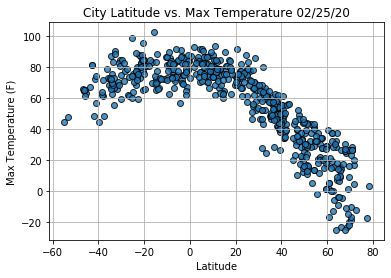

In [12]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/LatTemp.png")

# Show plot.
plt.show()

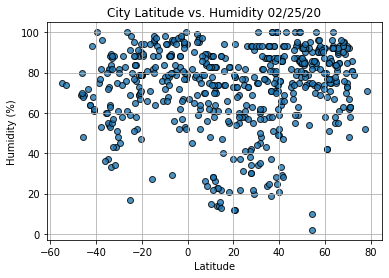

In [13]:
# Build the scatter plot for latitude vs.Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/LatHum.png")

# Show plot.
plt.show()

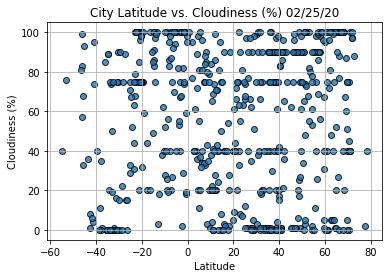

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatCloud.png")
# Show plot.
plt.show()

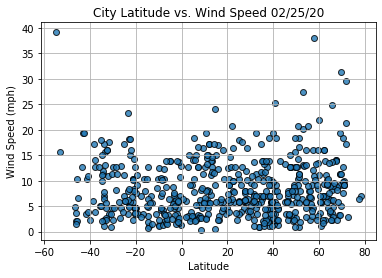

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/LatWind.png")
# Show plot.
plt.show()

In [33]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

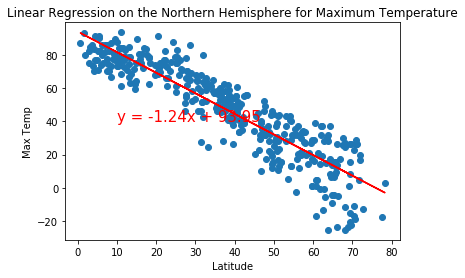

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

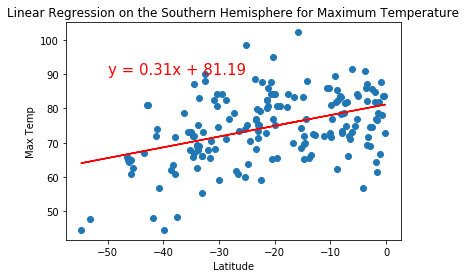

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

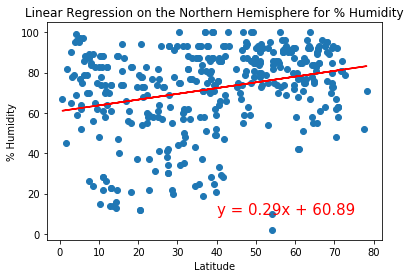

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

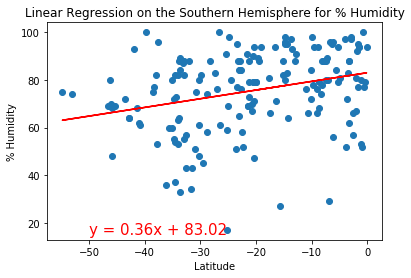

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

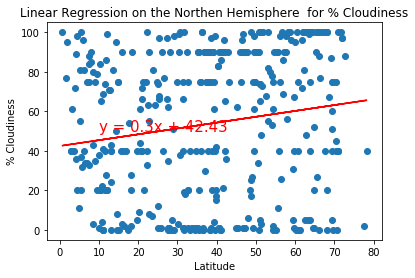

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northen Hemisphere  for % Cloudiness', '% Cloudiness',(10,50))

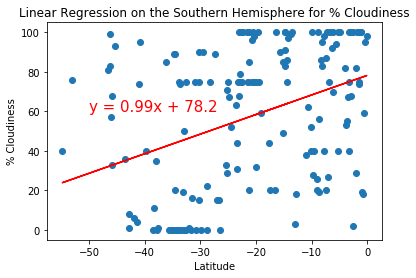

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))